# 生成5类非均匀分布的二维数据

导入所需要的库

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

生成5类非均匀分布的二维数据

In [92]:
np.random.seed(42) # 设置随机种子，确保可重复性

def generate_data():
    """ 生成 5 类非均匀分布的二维数据 """
    centers = [(-5, -2), (3, 5), (-2, 6), (6, -4), (1, 1)]
    num_samples = [50, 30, 40, 20, 60]  # 总和 200

    X, y = [], []
    for i, (cx, cy) in enumerate(centers):
        X.append(np.random.randn(num_samples[i], 2) + np.array([cx, cy]))
        y.extend([i] * num_samples[i])

    return np.vstack(X), np.array(y)

# 生成数据
X, y = generate_data()

绘制有标签和无标签的原始数据

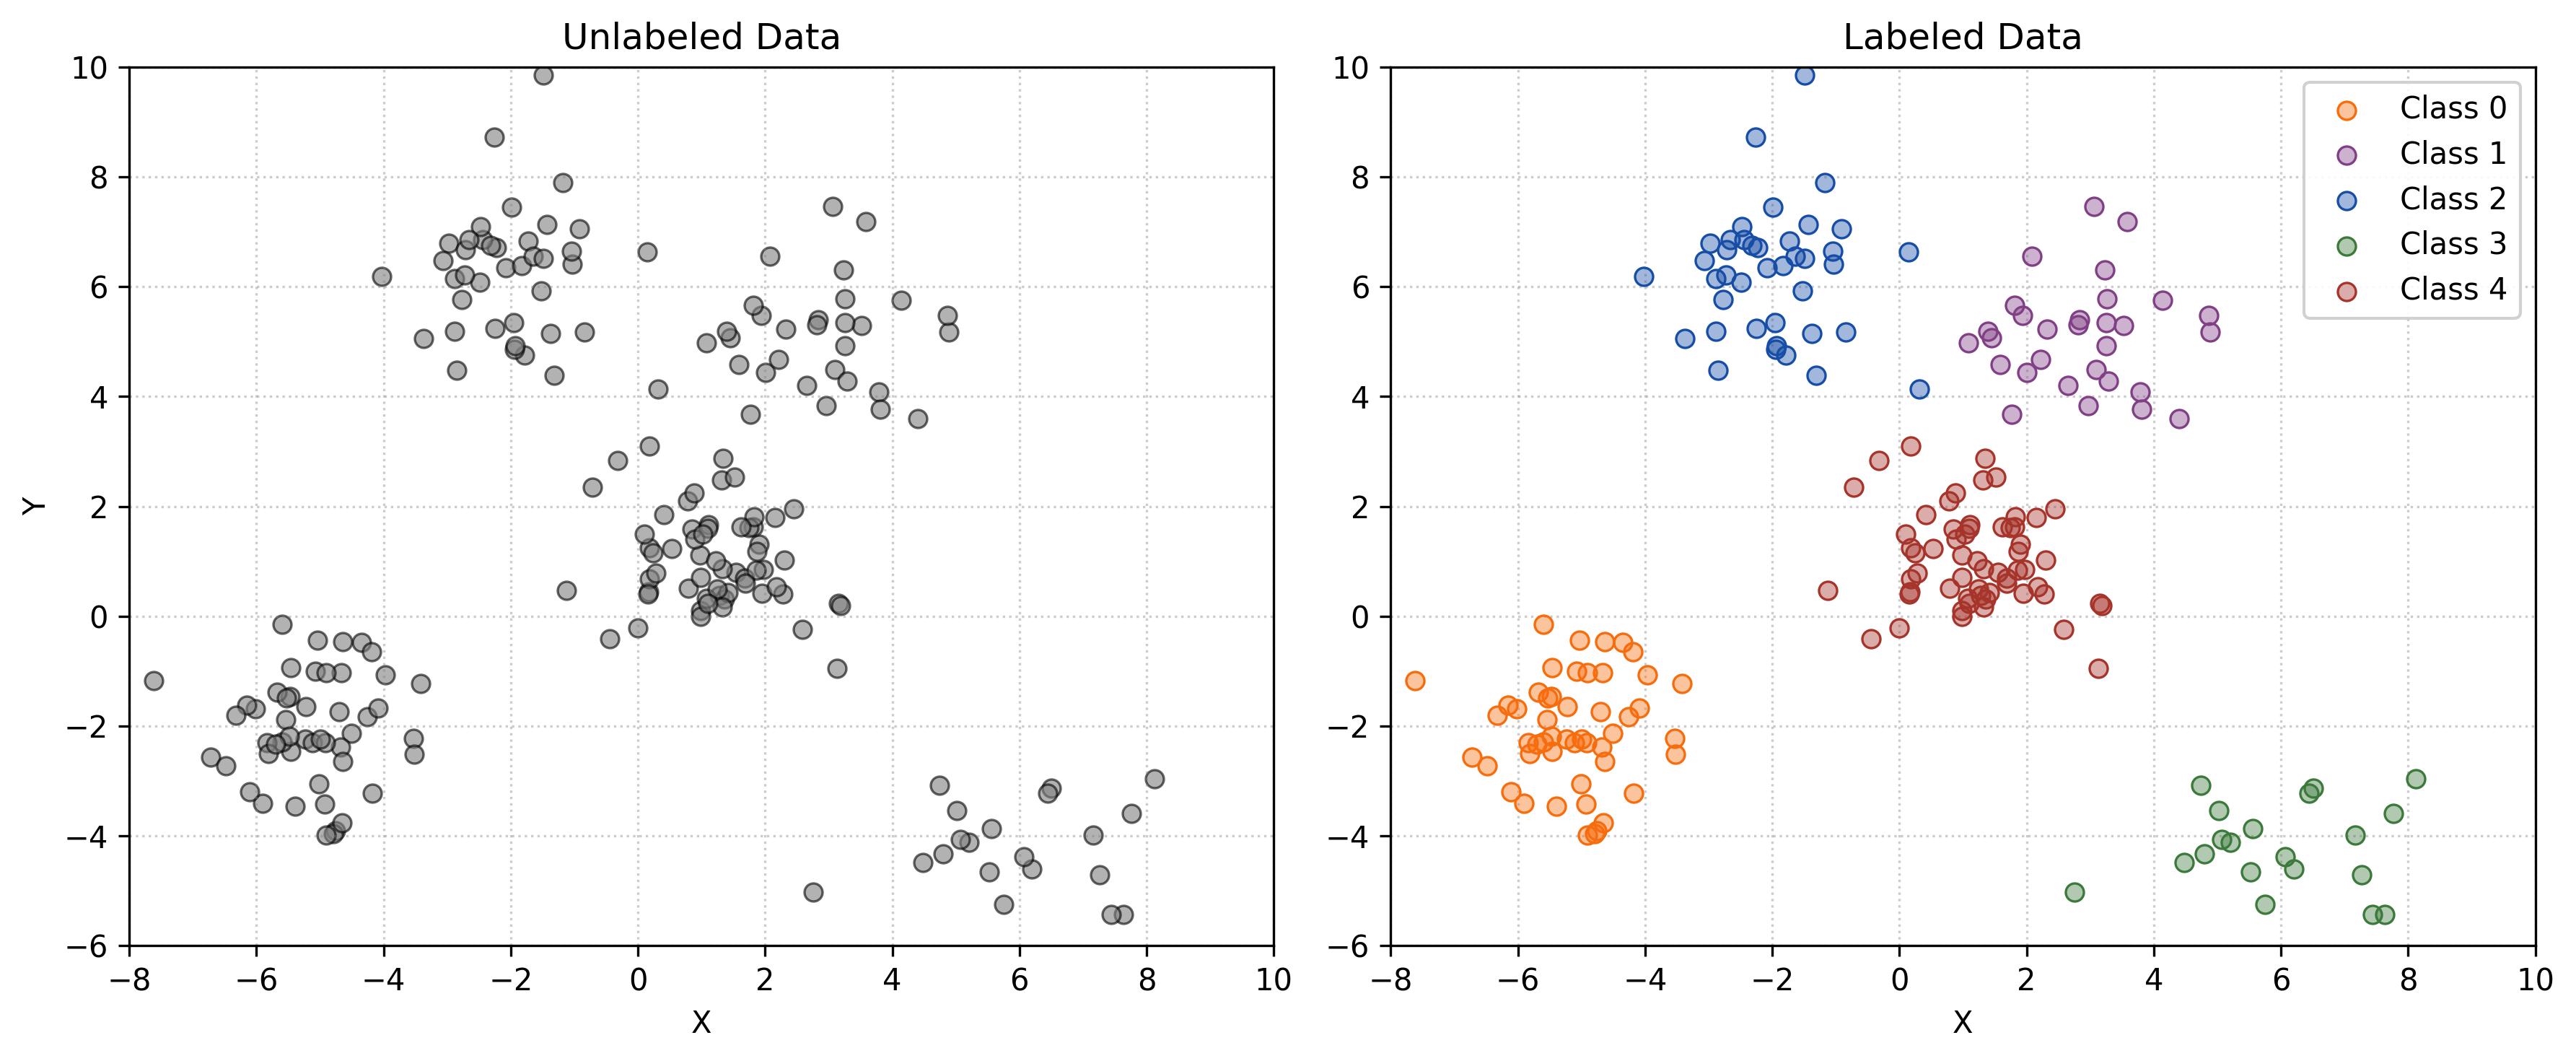

In [93]:
class_colors = [
    (0.970, 0.424, 0.046),   # Class 0
    (0.505, 0.250, 0.520),   # Class 1
    (0.086, 0.302, 0.651),   # Class 2
    (0.235, 0.480, 0.235),   # Class 3
    (0.650, 0.204, 0.169),   # Class 4
    (0.000, 0.392, 0.431),   # Class 5
    (1.000, 0.651, 0.000)    # Class 6
]

def plot_data(X, y, colors):
    """ 绘制无标签和有标签的原始数据 """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

    # 左图：无标签数据
    ax1.scatter(X[:, 0], X[:, 1], 
                c='grey', edgecolor='black', alpha=0.6, linewidths=0.8)
    ax1.set(xlabel="X", ylabel="Y", title="Unlabeled Data")

    # 右图：带标签数据
    for i in range(5):
        ax2.scatter(X[y == i, 0], X[y == i, 1],
                    facecolors=[(*colors[i], 0.4)],  
                    edgecolors=[colors[i]], linewidths=0.8, label=f'Class {i}', zorder=2)               

    ax2.legend(loc='upper right', framealpha=0.9)
    ax2.set(xlabel="X", title="Labeled Data")

    for ax in [ax1, ax2]:
        ax.set(xlim=(-8, 10), ylim=(-6, 10))
        ax.grid(True, linestyle=':', color='gray', alpha=0.4)

    plt.tight_layout()
    plt.show()

# 绘制数据
plot_data(X, y, class_colors)

# K-means聚类分析

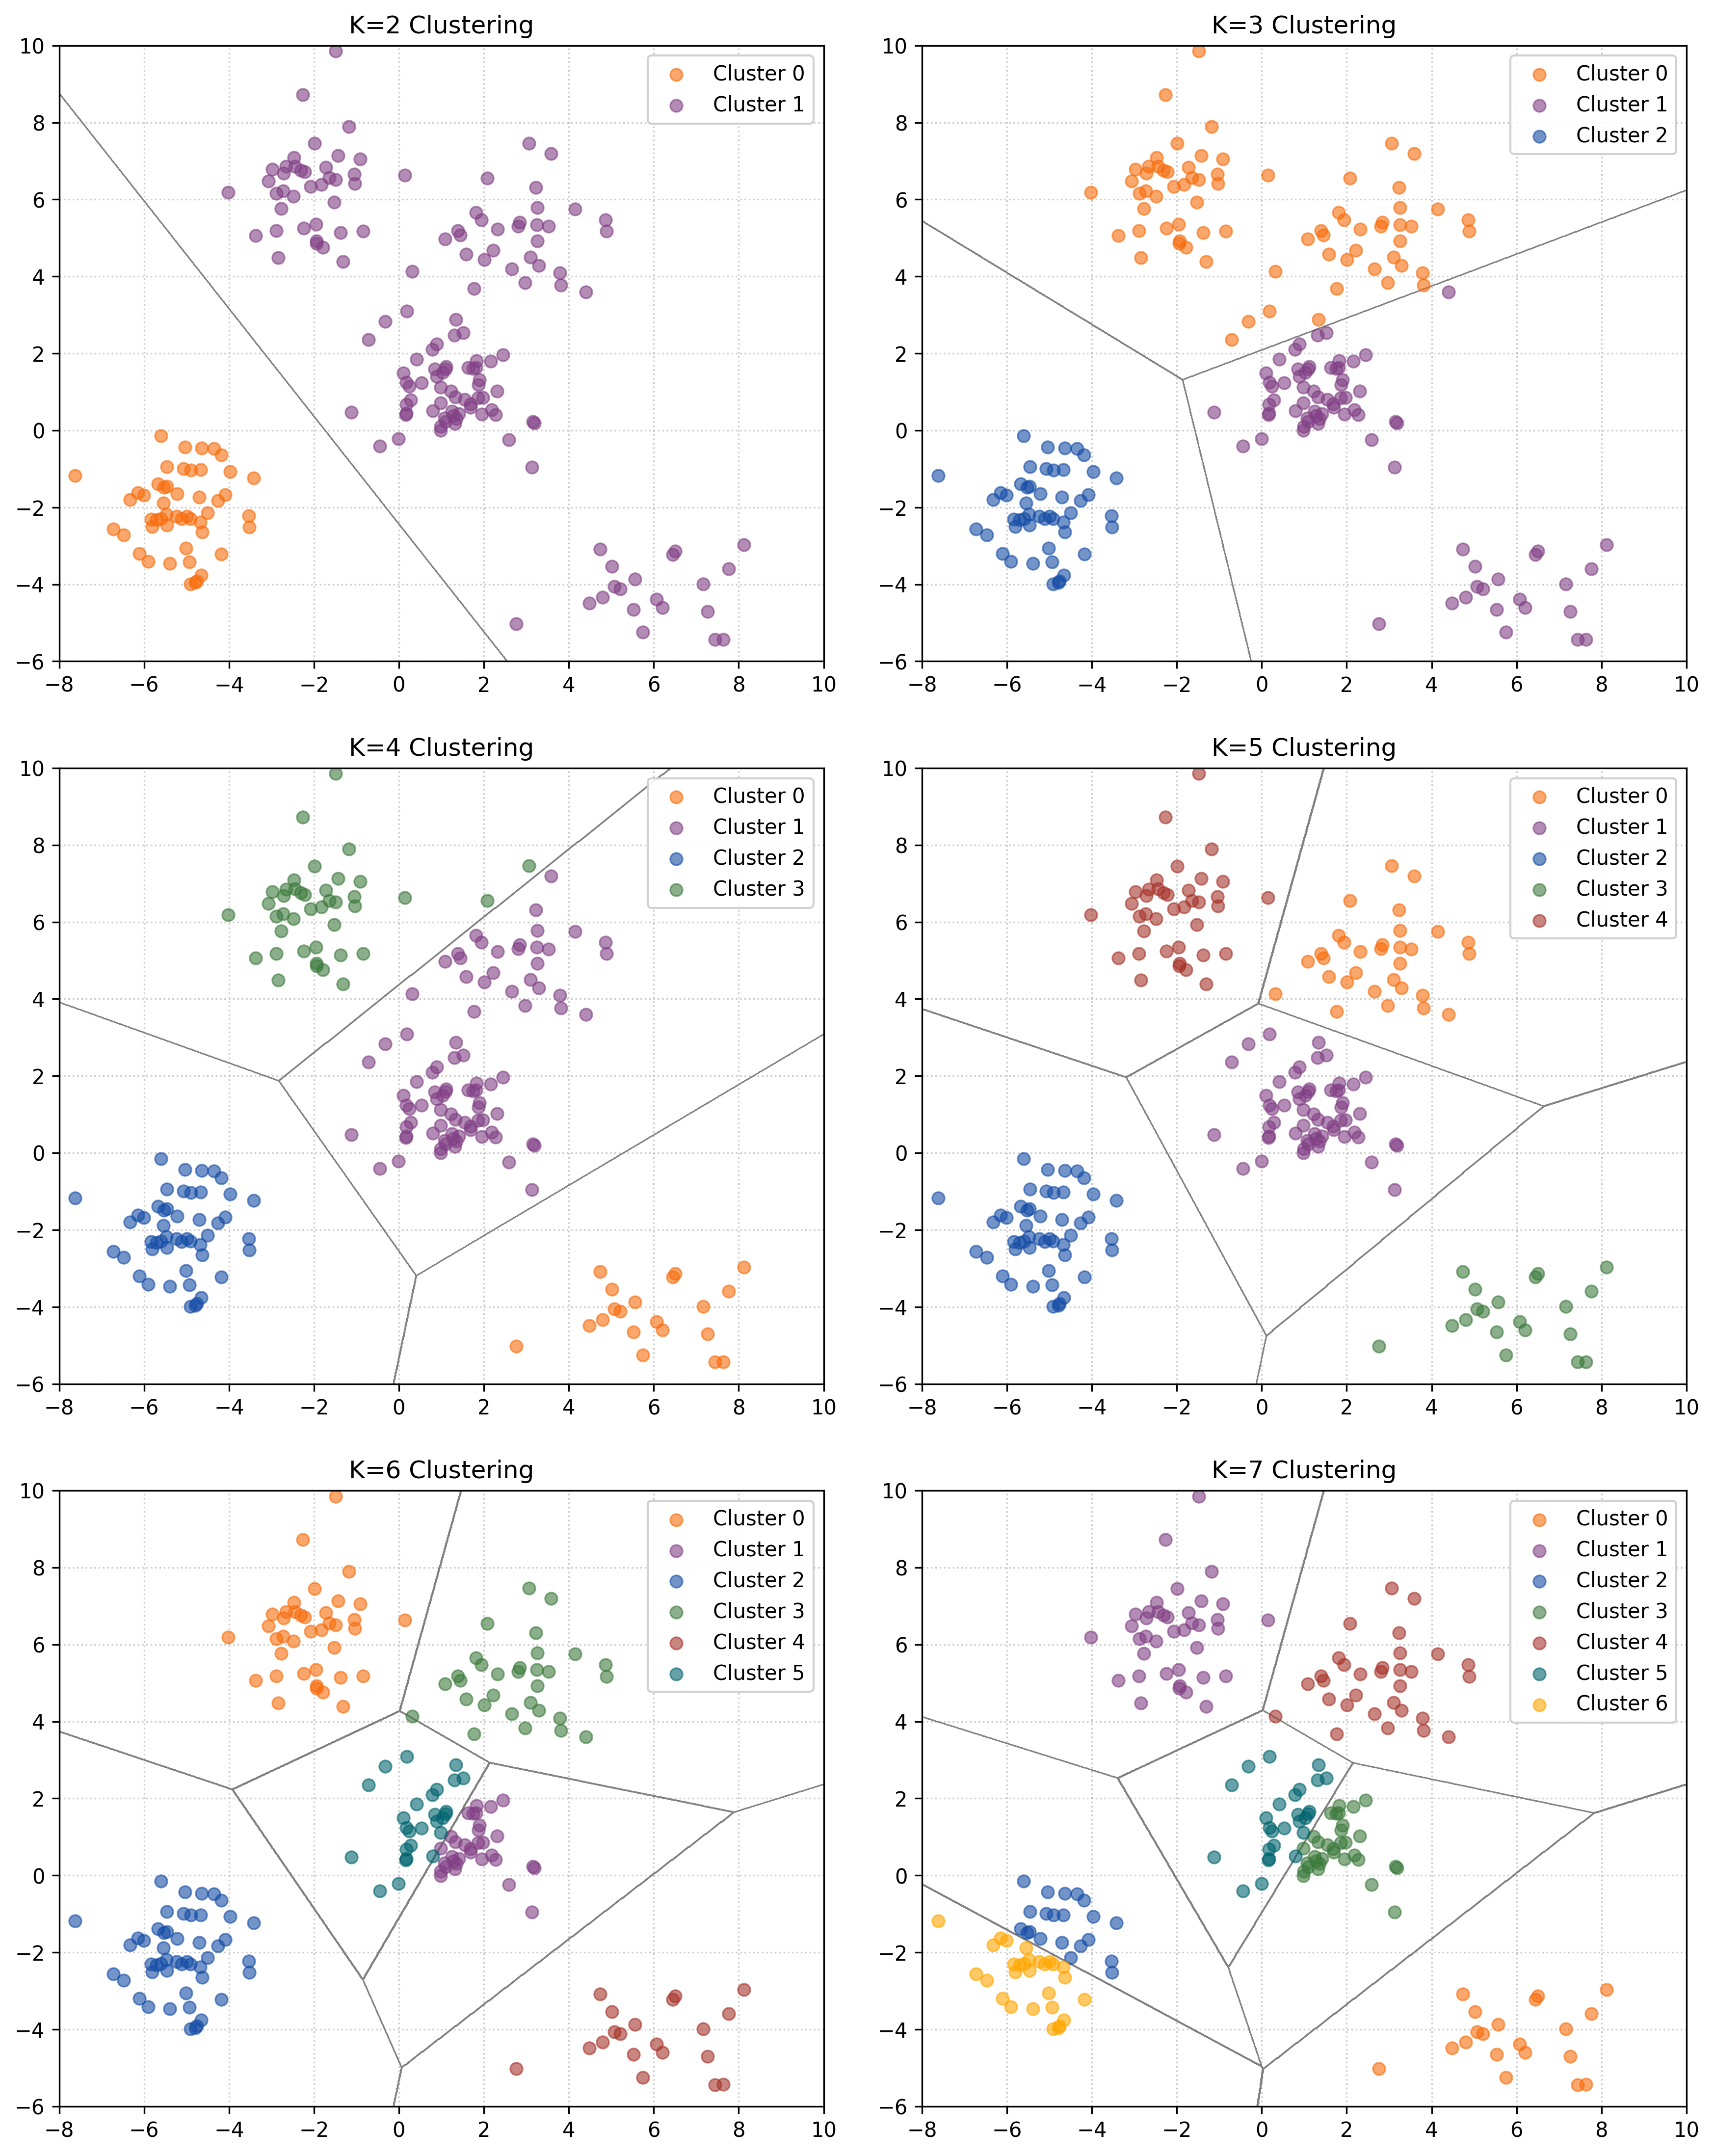

In [97]:
def plot_clusters(ax, X, k, colors):
    """ 可视化 K-Means 聚类结果 """
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    xx, yy = np.meshgrid(np.linspace(-8, 10, 1000), 
                         np.linspace(-6, 10, 1000))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 绘制决策边界
    ax.contour(xx, yy, Z, levels=np.arange(-0.5, k+0.5), colors='gray', linewidths=0.7, linestyles='solid')

    # 绘制聚类数据点
    for i in range(k):
        mask = labels == i
        ax.scatter(X[mask, 0], X[mask, 1],
                   facecolors=[(*colors[i], 0.4)],
                   edgecolors=[colors[i]],
                   linewidths=0.8, alpha=0.6, zorder=2, label=f'Cluster {i}')

def visualize_kmeans(X, colors):
    """ 对不同的 K 值进行 K-Means 聚类并可视化 """
    k_values = range(2, 8)

    n_rows = int(np.ceil(len(k_values) / 2))  # 每行2个子图
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows), dpi=300, squeeze=False)

    for idx, k in enumerate(k_values):
        row, col = divmod(idx, 2)
        plot_clusters(axs[row, col], X, k, colors[:k])
        axs[row, col].set(xlim=(-8, 10), ylim=(-6, 10),
                          xticks=np.arange(-8, 11, 2), yticks=np.arange(-6, 11, 2),
                          title=f"K={k} Clustering")
        axs[row, col].grid(True, linestyle=':', color='gray', alpha=0.4)
        axs[row, col].legend(loc='upper right', framealpha=0.9)

    plt.tight_layout(pad=2.0)
    plt.show()

# 运行 K-Means 并可视化
visualize_kmeans(X, class_colors)

# 确定选择的 K 值

## 方法1: Elbow Method肘部法